# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
import scipy.stats as st

df = pd.read_csv('data/human_body_temperature.csv')

C:\Users\vu.nguyen.SILIXA\AppData\Local\Continuum\Anaconda_Springboard\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.17094017, 0.        , 0.17094017, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.34188034, 0.        ,
        0.        , 0.17094017, 0.        , 0.17094017, 0.        ,
        0.17094017, 0.        , 0.51282051, 0.        , 0.        ,
        0.51282051, 0.        , 0.17094017, 0.        , 0.85470085,
        0.        , 0.34188034, 0.        , 0.68376068, 0.        ,
        0.        , 0.51282051, 0.        , 1.1965812 , 0.        ,
        0.85470085, 0.        , 1.88034188, 0.        , 0.        ,
        0.51282051, 0.        , 1.70940171, 0.        , 0.85470085,
        0.        , 1.53846154, 0.        , 0.51282051, 0.        ,
        0.        , 1.70940171, 0.        , 1.36752137, 0.        ,
        1.70940171, 0.        , 0.34188034, 0.        , 0.        ,
        0.85470085, 0.        , 0.51282051, 0.        , 0.51282051,
        0.        , 0.34188034, 0.        , 0.34188034, 0.        ,
        0.        , 0.17094017, 0.        , 0.  

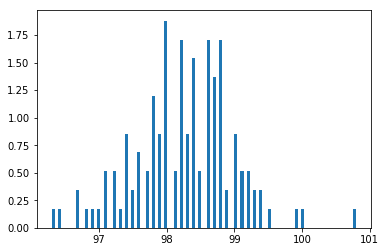

In [3]:
plt.hist(df['temperature'], bins=100, normed=True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


2/ As its shown, there are 130 data points for temperature, gender and hear rate, which is bigger than 30. Therefore, the data size is big enough 

3/ Is the true population mean really 98.6 degrees F?

In [9]:
def bootstrap_replicate_1d(data,func,n):
    
    bs_sample=np.random.choice(data,n)
    
    return func(bs_sample)

def draw_bs_reps(data,func,n,size=1):
    bs_replicates=np.empty(size)
    
    for i in range (size):
        bs_replicates[i]=bootstrap_replicate_1d(data,func,n)
        
    return bs_replicates

(array([  43.,  269.,  958., 2153., 2805., 2307., 1121.,  281.,   56.,
           7.]),
 array([97.906 , 97.9818, 98.0576, 98.1334, 98.2092, 98.285 , 98.3608,
        98.4366, 98.5124, 98.5882, 98.664 ]),
 <a list of 10 Patch objects>)

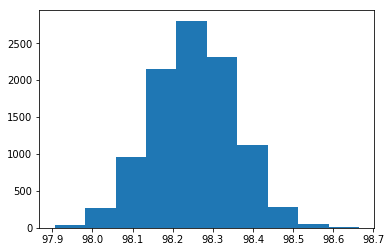

In [10]:
bs_mean=draw_bs_reps(df['temperature'],np.mean,50,10000)

bs_std=draw_bs_reps(df['temperature'],np.std,50,10000)

plt.hist(bs_mean)

The distribution of the mean sampling by boostrap is normal. Next we calculate 95% and 99% Confidence Interval to see if the mean of 
human body temperature determined by Carl Wunderlich will be included in the range 


In [11]:
# Compute 95% confidence interval 
ci_95=np.percentile(bs_mean,[2.5,97.5])
print('95% confidence interval =', ci_95)

# Compute 99% confidence interval 
ci_99=np.percentile(bs_mean,[0.5,99.5])
print('99% confidence interval =', ci_99)

95% confidence interval = [98.048   98.45205]
99% confidence interval = [97.984 98.522]


As we can see from 95% and 99% confidence interval, the normal body temperature proposed by Carl Wunderlich 
was not included in neither 95% and 99% inverval.

Next, the hypothesis test is carried out to see if we can reject the null hypthosis.

Ho: The mean normal body temperature was held to be 98.6F 

Ha: The mean normal body temperature was not equal to 98.6 F 

The significant level is set to 5 % 


In [12]:
mean_sm= np.mean(bs_mean)
mean_std=np.mean(bs_std)

Z=(mean_sm-98.6)/(mean_std/math.sqrt(50))

prob_z=st.norm.sf(abs(Z))

print('The probablity is : ', prob_z*100)

The probablity is :  0.030544562023924728


Because the probability to obtain the mean from bootstrap sampling given the null hypotheis is less than the significant level
the null hypothesis can be rejected. 

In [ ]:
frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

In [ ]:
The objective here is to find the population mean for the human normal temperature and see if it's equal to a specific value 98.6F.
So one-sample test would be enough. 

In [13]:
mean_temp=np.mean(df['temperature'])

In [14]:
std_temp=np.std(df['temperature'])

Using Z-Score 

In [ ]:
Z_freq=(mean_temp-98.6)/(std_temp/math.sqrt(len(df)))
prob=st.norm.sf(abs(Z_freq))

print('The probability is:', prob)

Because the probability is less than significant level, the null hypothesis can be rejected.

Using T-Score

In [25]:
from scipy import stats 
t_test=stats.ttest_1samp(df['temperature'],98.6)

print ('t_score : ' + str(t_test[0]) + '    p_value : ' + str(t_test[1]))

t_score : -5.4548232923645195    p_value : 2.4106320415561276e-07


In this case, because n>30, it's more appropriate to use Z score than t-score. 

4/ Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

In [42]:
sample_10 = random.sample(list(df['temperature']), 10)
mean_temp_10=np.mean(sample_10)
std_temp_10=np.std(sample_10)

Z_freq=(mean_temp_10-98.6)/(std_temp_10/math.sqrt(10))
prob=st.norm.sf(abs(Z_freq))

print('The probability is:', prob)

The probability is: 0.002531016063134046


In [34]:
import random

t_test=stats.ttest_1samp(sample_10,98.6)

print ('t_score : ' + str(t_test[0]) + '    p_value : ' + str(t_test[1]))

t_score : -0.7118618716695648    p_value : 0.49458787310825836


At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [45]:
#Bootstrap approach: using n=50, 95% CI 

std_error=mean_std/math.sqrt(50)

upper_lim=mean_sm+1.64*std_error
lower_lim=mean_sm-1.65*std_error

print('Anything outside of the range', str(lower_lim), ' and',str(upper_lim), ' are abnormal temperature')

Anything outside of the range 98.08344694462578  and 98.41820156412955  are abnormal temperature


In [46]:
# Frequentist approach
std_error=std_temp/math.sqrt(130)

upper_lim=mean_temp+1.64*std_error
lower_lim=mean_temp-1.65*std_error

print('Anything outside of the range', str(lower_lim), ' and',str(upper_lim), ' are abnormal temperature')

Anything outside of the range 98.1435373549837  and 98.35428361733089  are abnormal temperature


In [ ]:
Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

In [49]:
def bootstrap_replicate_1d(data,func,n):
    
    bs_sample=np.random.choice(data,n)
    
    return func(bs_sample)

def draw_bs_reps(data,func,n,size=1):
    bs_replicates=np.empty(size)
    
    for i in range (size):
        bs_replicates[i]=bootstrap_replicate_1d(data,func,n)
        
    return bs_replicates

(array([  20.,  132.,  746., 1862., 2979., 2600., 1214.,  375.,   62.,
          10.]),
 array([98.01  , 98.0908, 98.1716, 98.2524, 98.3332, 98.414 , 98.4948,
        98.5756, 98.6564, 98.7372, 98.818 ]),
 <a list of 10 Patch objects>)

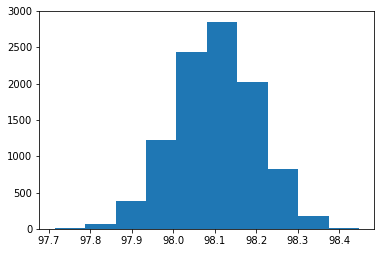

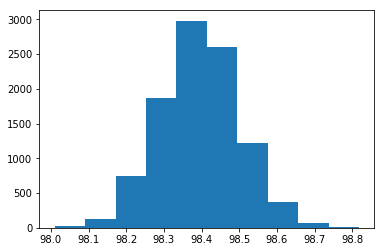

In [54]:
male_temp=df[df['gender']=='M']
female_temp=df[df['gender']=='F']


bs_male_temp_mean=draw_bs_reps(male_temp['temperature'],np.mean,50,10000)
bs_male_temp_std=draw_bs_reps(male_temp['temperature'],np.std,50,10000)


bs_female_temp_mean=draw_bs_reps(female_temp['temperature'],np.mean,50,10000)
bs_female_temp_std=draw_bs_reps(female_temp['temperature'],np.std,50,10000)

plt.figure()
plt.hist(bs_male_temp_mean)

plt.figure()
plt.hist(bs_female_temp_mean)



In [55]:
bs_male_mean_temp_ave=np.mean(bs_male_temp_mean)
bs_male_std_temp_ave=np.mean(bs_male_temp_std)

bs_female_mean_temp_ave=np.mean(bs_female_temp_mean)
bs_female_std_temp_ave=np.mean(bs_female_temp_std)

mean_dff=bs_male_mean_temp_ave-bs_female_mean_temp_ave

Z=(mean_dff)/(math.sqrt((bs_male_std_temp_ave/130)**2 +(bs_female_std_temp_ave/130)**2 ) )

prob_z=st.norm.sf(abs(Z))

print('The probablity is : ', prob_z*100)



The probablity is :  0.0


In [ ]:
Because the probability is less than significant level, the null hypothesis is rejected. 